## Reading the combined data file

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data/allCombined_data.csv')
df.head()
# df.tail()

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total EU27_x,Total Non EU_x,Total Export,Total EU27_y,Total Non EU_y,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,110685,76139,186824,118975,107664,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,114783,75899,190682,131885,107429,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,115045,72414,187459,141776,100230,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,111256,76627,187883,143112,102066,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,111972,79090,191062,147523,110890,258413,74.00,69.00,4.8,1982500


In [4]:
# dropping the eu exports and 
df=df.drop(columns=['Total EU27_x','Total Non EU_x','Total EU27_y','Total Non EU_y'])
df.head()

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,186824,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,190682,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,187459,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,187883,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,191062,258413,74.00,69.00,4.8,1982500


## 1. Missing Values

In [5]:
# 1st Step is to make the list of features which has missing values
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
print(feature_na)

for feature in feature_na:
    print(feature,np.round(df[feature].isnull().mean(),4),'% of missing value')


# Percentage of missing values if persist. However, all the null rows are removed in the previous snippet

[]


In [6]:
df.describe()

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
count,24.000000,24.000000,2.400000e+01,24.00000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01
mean,2011.500000,94.242038,6.338690e+07,41.87500,1.192846e+06,2.243750,3.958333,9.316667,278247.833333,388668.416667,82.427083,85.208333,5.504167,2.176768e+06
std,7.071068,15.170900,2.990856e+06,3.86402,1.193122e+05,2.145486,10.719909,20.151829,70155.708616,112247.893702,10.899611,12.591980,1.347293,2.153488e+05
min,2000.000000,73.406083,5.888610e+07,35.10000,9.710500e+05,0.100000,-14.100000,-10.200000,186824.000000,226639.000000,67.750000,68.250000,3.900000,1.796500e+06
25%,2005.750000,80.868313,6.072365e+07,39.80000,1.124212e+06,0.500000,-3.650000,-0.775000,220242.250000,308928.000000,73.437500,74.187500,4.675000,2.036492e+06
50%,2011.500000,94.788917,6.349795e+07,40.65000,1.168310e+06,0.625000,3.250000,5.500000,285038.500000,406403.000000,79.625000,82.875000,5.150000,2.138383e+06
75%,2017.250000,104.181667,6.604672e+07,44.52500,1.296557e+06,4.125000,10.850000,11.375000,318346.250000,451253.000000,93.562500,97.375000,5.825000,2.354358e+06
max,2023.000000,128.640167,6.826520e+07,53.10000,1.378649e+06,6.000000,30.100000,92.600000,434123.000000,640659.000000,100.000000,103.250000,8.100000,2.535017e+06


In [7]:
df.info()
# based on this info its observable that all the data are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Year                                                                   24 non-null     int64  
 1   CPIH ALL ITEMS                                                         24 non-null     float64
 2   United Kingdom population mid-year estimate                            24 non-null     int64  
 3   Total managed expenditure with respect to GDP                          24 non-null     float64
 4   Household final consumption expenditure :National concept CVM SA - £m  24 non-null     int64  
 5   Bank Rate                                                              24 non-null     float64
 6   RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil   24 non-null     float

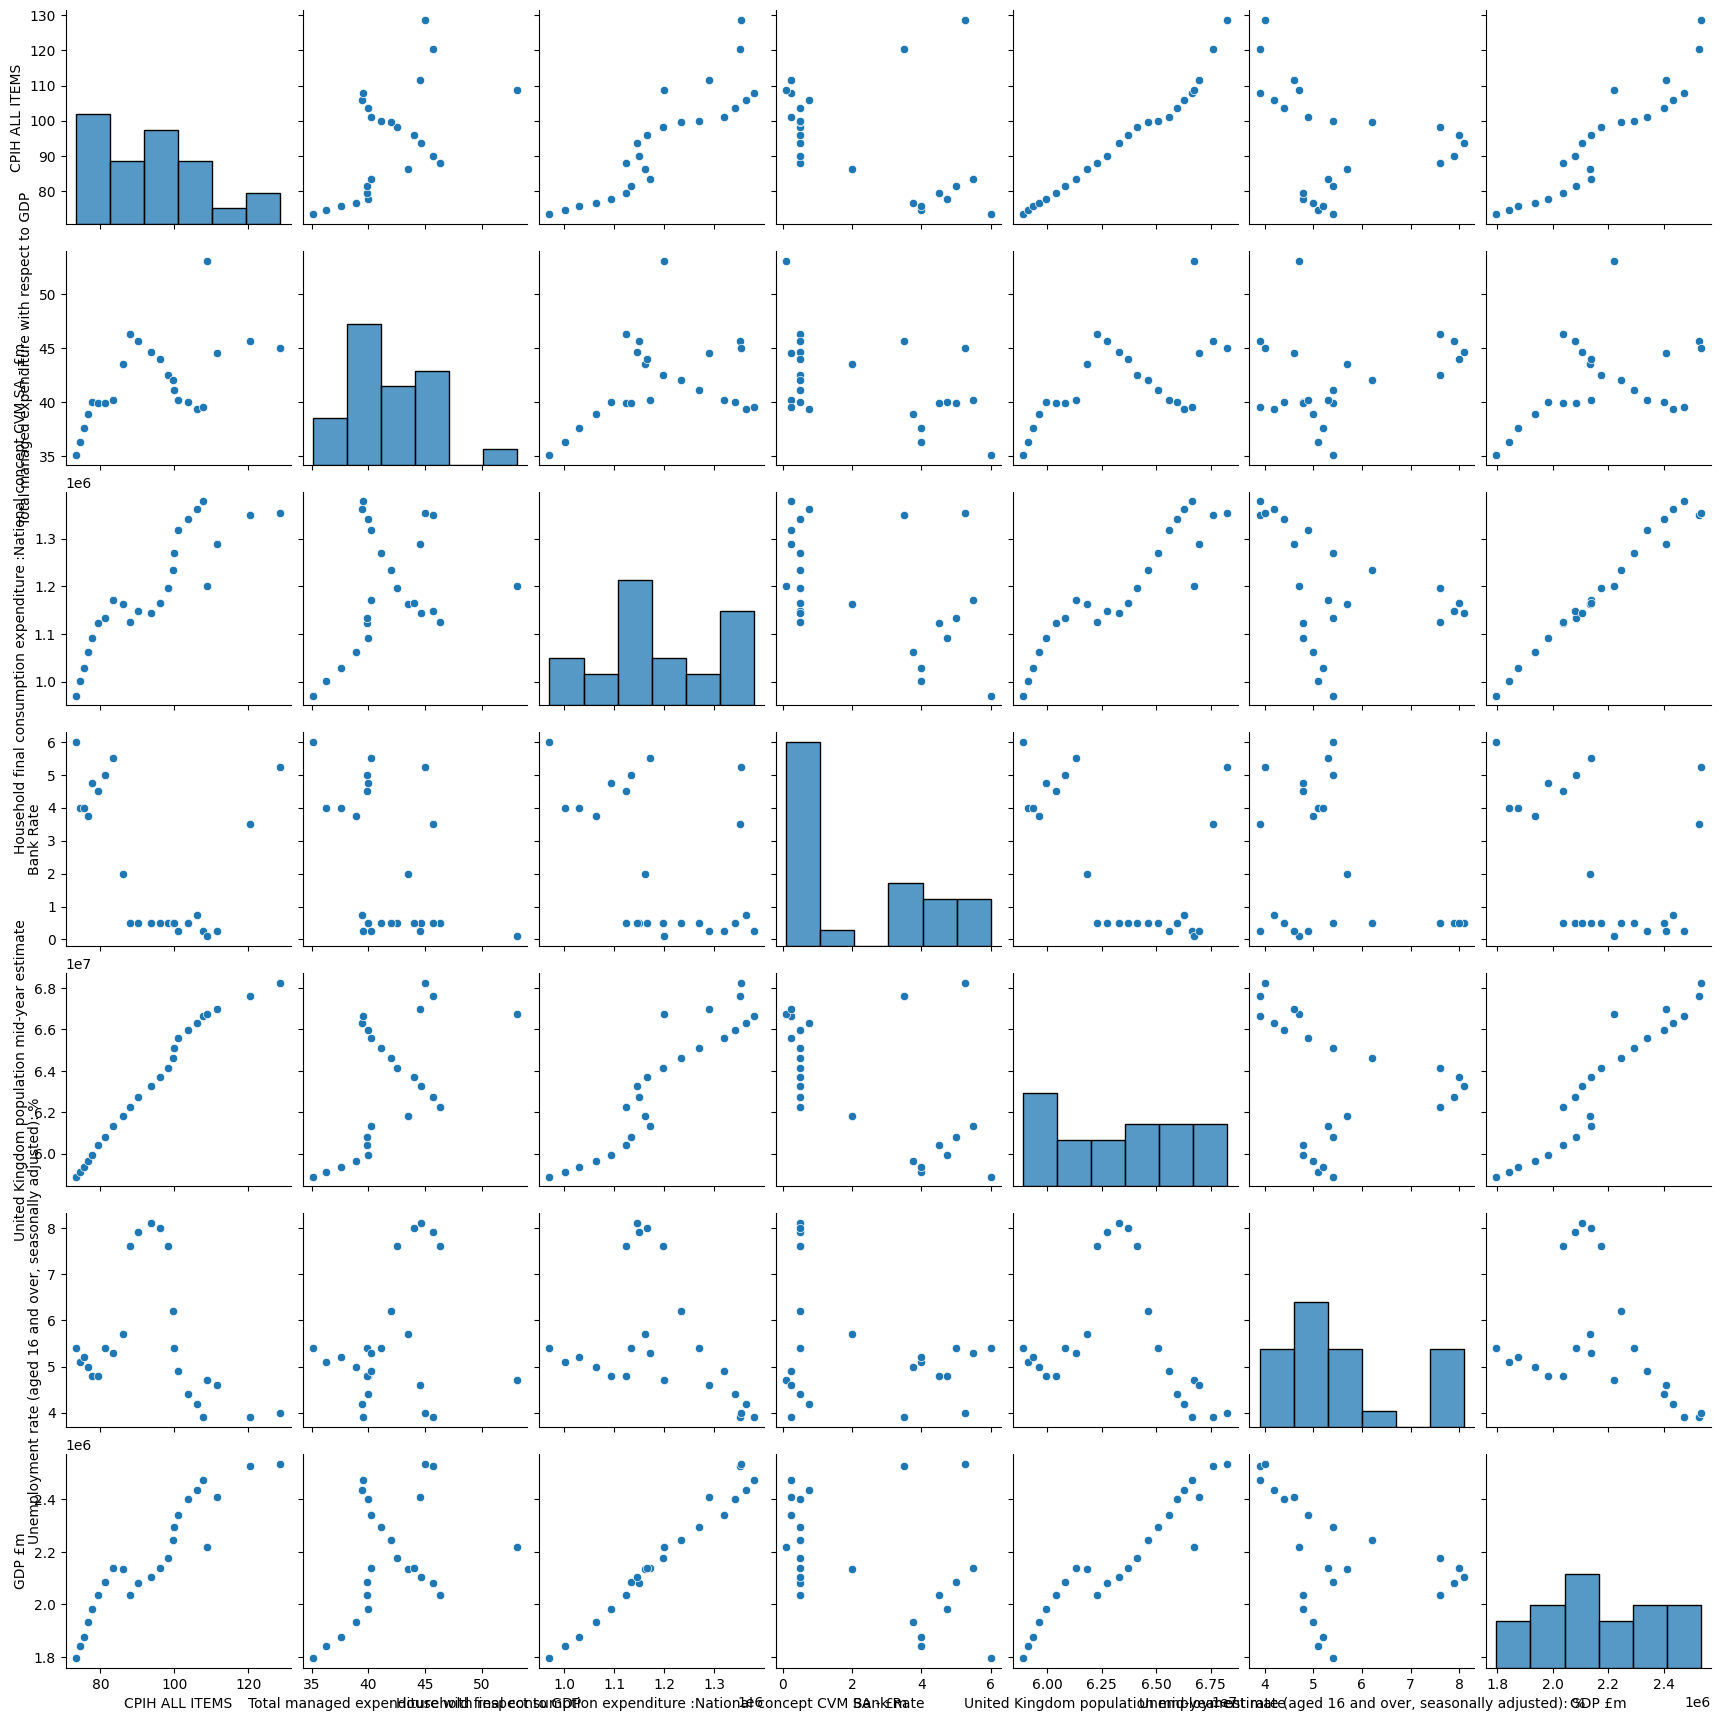

In [8]:
# taking first few columns
columns=['CPIH ALL ITEMS',
       'Total managed expenditure with respect to GDP',
       'Household final consumption expenditure :National concept CVM SA - £m',
       'Bank Rate','United Kingdom population mid-year estimate',
       'Unemployment rate (aged 16 and over, seasonally adjusted): %',
       'GDP £m']

sns.pairplot(df[columns])

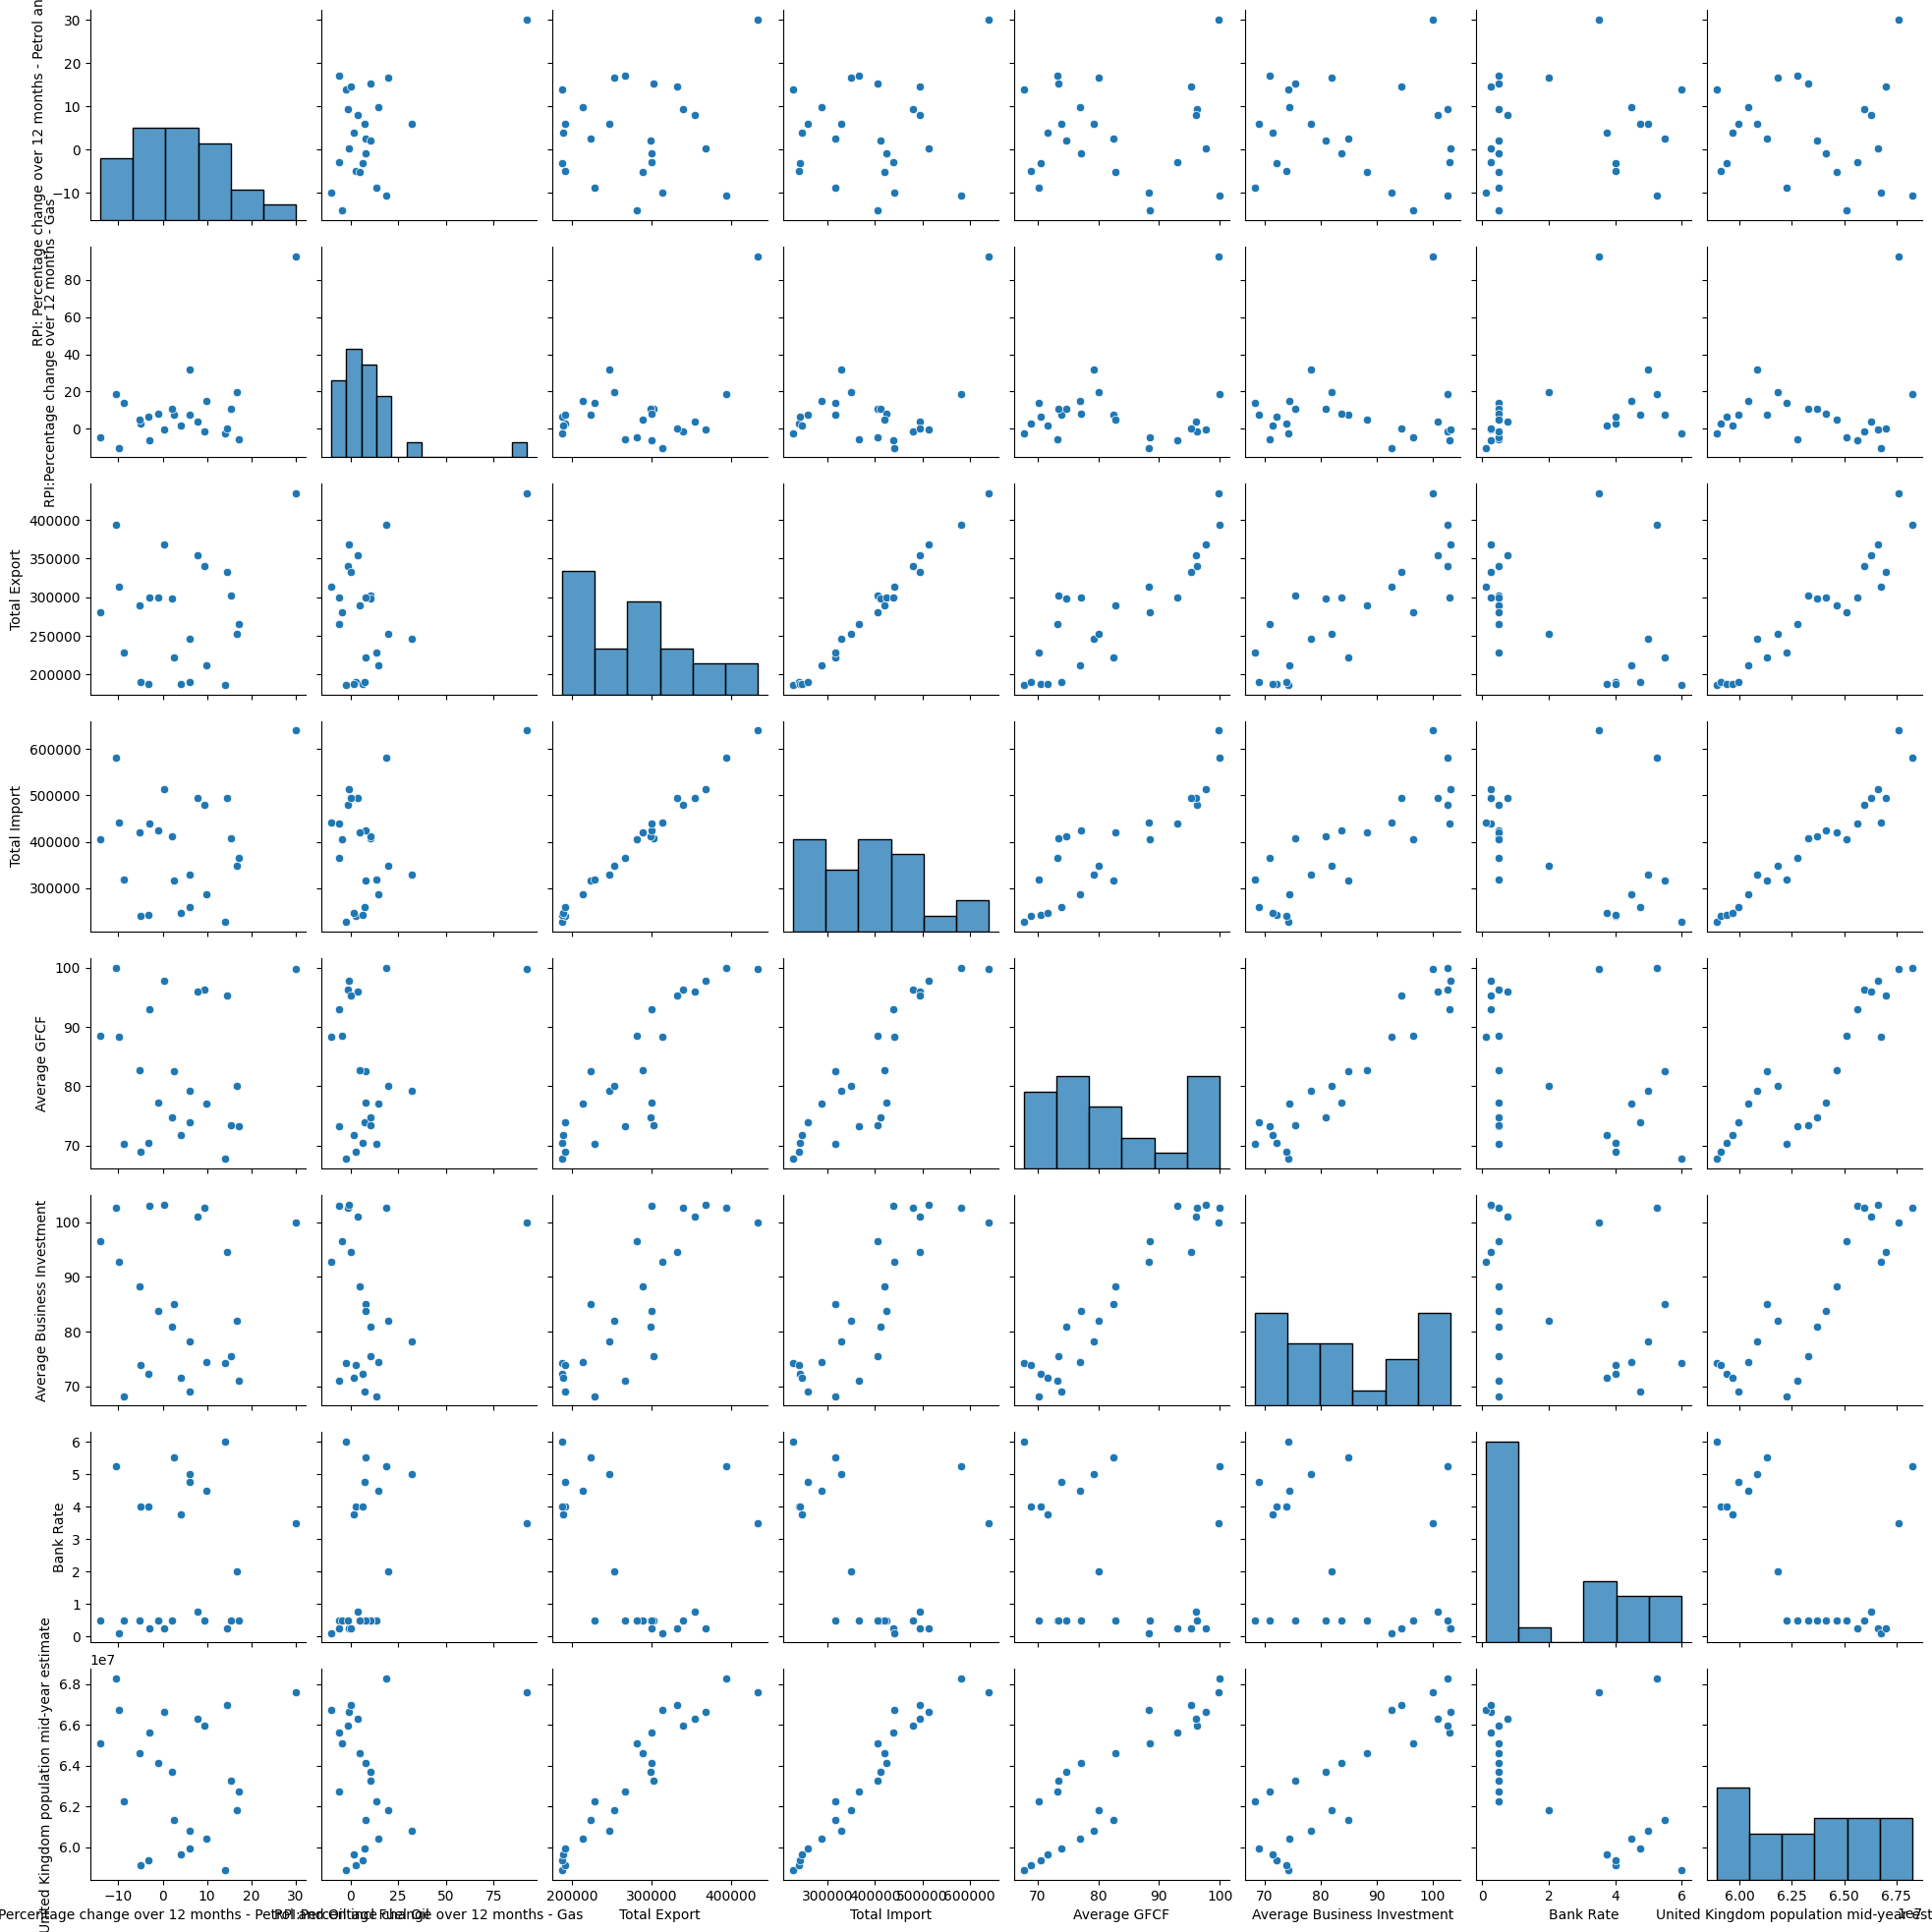

In [9]:
columns=['RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil',
       'RPI:Percentage change over 12 months - Gas', 'Total Export','Total Import', 'Average GFCF', 'Average Business Investment',
       'Bank Rate','United Kingdom population mid-year estimate']
sns.pairplot(df[columns])

In [10]:
# Identify columns with a small number of unique values (potential targets for classification)
for column in df.columns:
    if df[column].nunique() < 6:  # Adjust threshold as needed
        print(f"{column}: might be a target for classification")

df.head()

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,186824,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,190682,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,187459,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,187883,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,191062,258413,74.00,69.00,4.8,1982500


## Finding the Outlier

<Axes: title={'center': 'Total Import'}, xlabel='Total Import'>

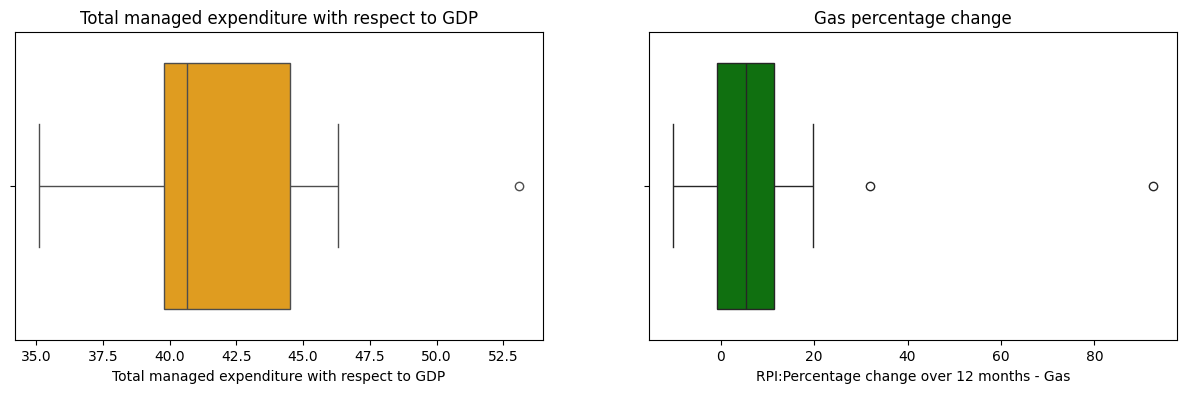

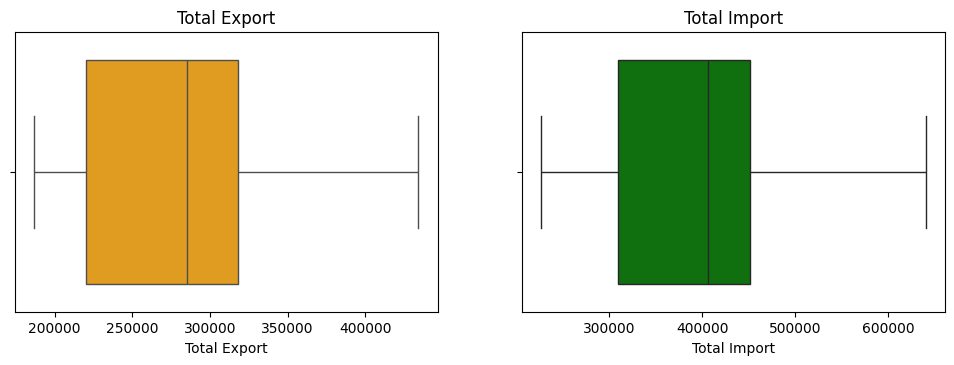

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)  
plt.title('Total managed expenditure with respect to GDP')
sns.boxplot(x=df['Total managed expenditure with respect to GDP'],color='orange')
plt.subplot(1, 2, 2)  
plt.title('Gas percentage change')
sns.boxplot(x=df['RPI:Percentage change over 12 months - Gas'],color='green')
# 

plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)  
plt.title('Total Export')
sns.boxplot(x=df['Total Export'],color='orange')
plt.subplot(2, 2, 2)  
plt.title('Total Import')
sns.boxplot(x=df['Total Import'],color='green')


## Finding Correlation and visualising the data

__Correlation of the column with the target column__

In [12]:
import pandas as pd


# df=df.drop(['Year' ],axis=1)
df.describe

correlation_matrix = df.corr()

target_correlation = correlation_matrix['United Kingdom population mid-year estimate']
print(target_correlation)

# from the output below it is clear that the column 
# 'CPIH ALL ITEMS',
# 'GDP £m','Household final consumption expenditure :National concept CVM SA - £m', 
# 'Total Import', 'Total Export',
# 'Average GFCF' and 'Average Business Investment' are highly correlated.



Year                                                                     0.997586
CPIH ALL ITEMS                                                           0.981132
United Kingdom population mid-year estimate                              1.000000
Total managed expenditure with respect to GDP                            0.558117
Household final consumption expenditure :National concept CVM SA - £m    0.927401
Bank Rate                                                               -0.567398
RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil    -0.050301
RPI:Percentage change over 12 months - Gas                               0.146734
Total Export                                                             0.947734
Total Import                                                             0.962009
Average GFCF                                                             0.887855
Average Business Investment                                              0.873714
Unemployment rat

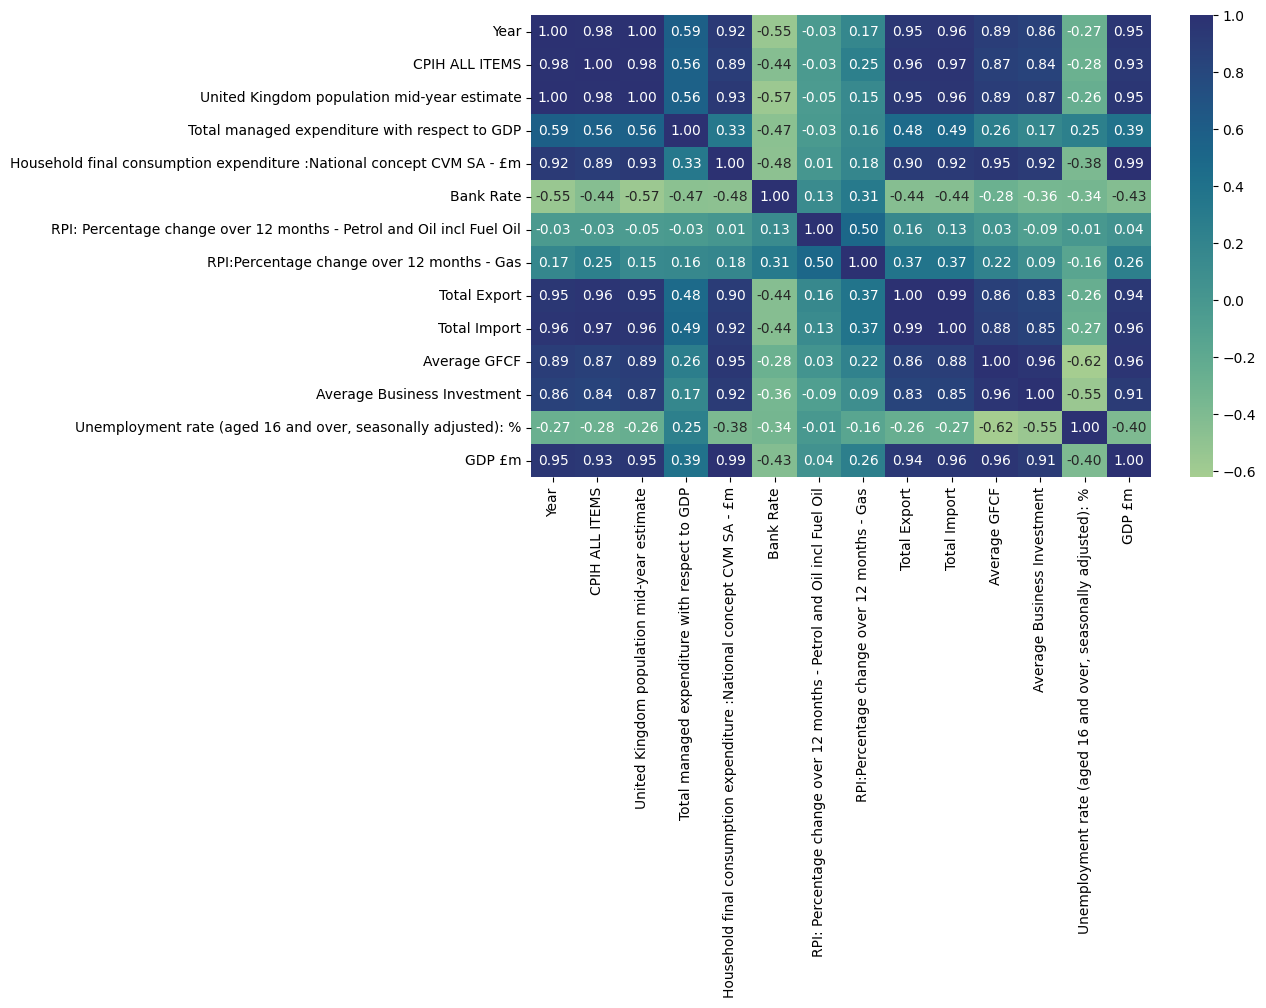

In [13]:
correlation_matrix=df.corr()
# create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='crest')
plt.show()

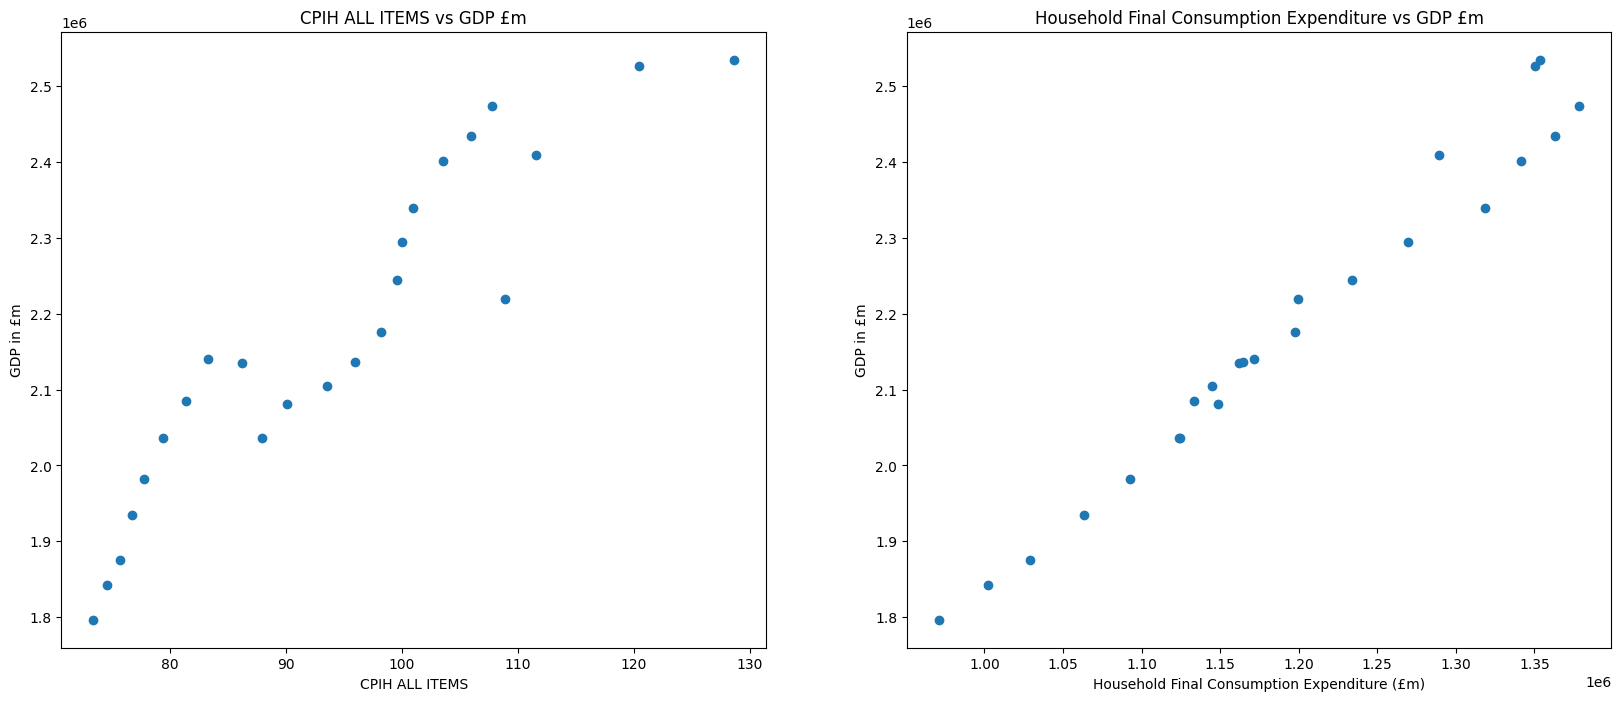

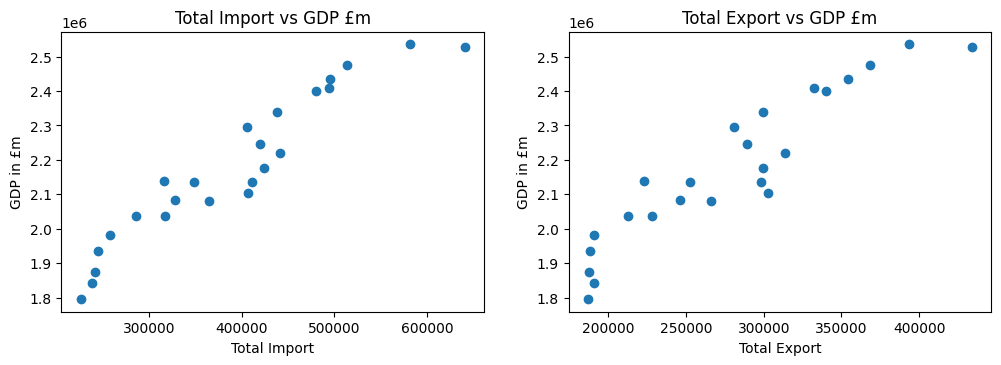

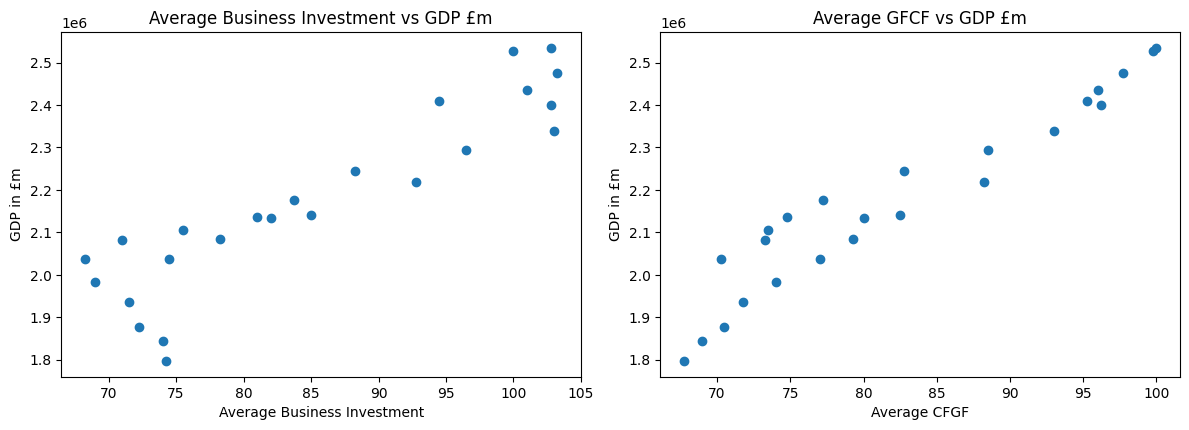

In [14]:
# distribution of the highly correlation value with the dependent variable
plt.figure(figsize=(20, 8))
# first plot
plt.subplot(1, 2, 1)  
plt.scatter(df['CPIH ALL ITEMS'], df['GDP £m'])
plt.title('CPIH ALL ITEMS vs GDP £m')
plt.xlabel('CPIH ALL ITEMS')
plt.ylabel('GDP in £m')

# second plot
plt.subplot(1, 2, 2)
plt.scatter(df['Household final consumption expenditure :National concept CVM SA - £m'], df['GDP £m'])
plt.title('Household Final Consumption Expenditure vs GDP £m')
plt.xlabel('Household Final Consumption Expenditure (£m)')
plt.ylabel('GDP in £m')
# ---------------------------------------------------------------------------

plt.figure(figsize=(12, 8))
# first plot
plt.subplot(2, 2, 1)  
plt.scatter(df['Total Import'], df['GDP £m'])
plt.title('Total Import vs GDP £m')
plt.xlabel('Total Import')
plt.ylabel('GDP in £m')

# second plot
plt.subplot(2, 2, 2)
plt.scatter(df['Total Export'], df['GDP £m'])
plt.title('Total Export vs GDP £m')
plt.xlabel('Total Export')
plt.ylabel('GDP in £m')
# --------------------------------------------------------------------------
plt.figure(figsize=(12,8))
# first plot
plt.subplot(2, 2, 1)  
plt.scatter(df['Average Business Investment'], df['GDP £m'])
plt.title('Average Business Investment vs GDP £m')
plt.xlabel('Average Business Investment')
plt.ylabel('GDP in £m')

# second plot
plt.subplot(2, 2, 2)
plt.scatter(df['Average GFCF'], df['GDP £m'])
plt.title('Average GFCF vs GDP £m')
plt.xlabel('Average CFGF')
plt.ylabel('GDP in £m')

plt.tight_layout()
plt.show()

## 2. Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaleddata=scalar.fit_transform(df.drop('Year',axis=1))
scaleddata

array([[-1.40295504e+00, -1.53722100e+00, -1.79106610e+00,
        -1.89893857e+00,  1.78842383e+00,  9.56877636e-01,
        -5.98993635e-01, -1.33118408e+00, -1.47454276e+00,
        -1.37553128e+00, -8.88980367e-01, -7.89783971e-02,
        -1.80380490e+00],
       [-1.32553288e+00, -1.45972475e+00, -1.47382930e+00,
        -1.62936683e+00,  8.36184854e-01, -8.53646024e-01,
        -3.35402642e-01, -1.27500936e+00, -1.35919439e+00,
        -1.25838170e+00, -9.09261288e-01, -3.06436181e-01,
        -1.58456015e+00],
       [-1.25043934e+00, -1.37341667e+00, -1.13015610e+00,
        -1.40293718e+00,  8.36184854e-01, -6.82122730e-01,
        -1.52916570e-01, -1.32193811e+00, -1.33469594e+00,
        -1.11780221e+00, -1.05122773e+00, -2.30616919e-01,
        -1.42760235e+00],
       [-1.18009842e+00, -1.28085835e+00, -7.86482899e-01,
        -1.10806579e+00,  7.17154981e-01,  3.97044662e-03,
        -3.81024160e-01, -1.31576442e+00, -1.30582927e+00,
        -1.00065263e+00, -1.11207050e

In [17]:
df2=df
df2

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,186824,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,190682,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,187459,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,187883,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,191062,258413,74.00,69.00,4.8,1982500
5,2005,79.404250,60413300,39.9,1123830,4.50,9.8,14.8,212494,286539,77.00,74.50,4.8,2036675
6,2006,81.356333,60827100,39.9,1133245,5.00,6.0,31.9,246418,328679,79.25,78.25,5.4,2085162
7,2007,83.305000,61319100,40.2,1171806,5.50,2.5,7.7,222825,316391,82.50,85.00,5.3,2139895
8,2008,86.222583,61823800,43.5,1162090,2.00,16.7,19.8,252593,348631,80.00,82.00,5.7,2134571
9,2009,87.933417,62260500,46.3,1124339,0.50,-8.8,13.7,227951,317207,70.25,68.25,7.6,2035942


In [18]:
df2.columns

Index(['Year', 'CPIH ALL ITEMS', 'United Kingdom population mid-year estimate',
       'Total managed expenditure with respect to GDP',
       'Household final consumption expenditure :National concept CVM SA - £m',
       'Bank Rate',
       'RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil',
       'RPI:Percentage change over 12 months - Gas', 'Total Export',
       'Total Import', 'Average GFCF', 'Average Business Investment',
       'Unemployment rate (aged 16 and over, seasonally adjusted): %',
       'GDP £m'],
      dtype='object')

## Training the model

In [21]:
from sklearn.linear_model import LinearRegression
X = df2[['CPIH ALL ITEMS', 'United Kingdom population mid-year estimate',
       'Total managed expenditure with respect to GDP',
       'Household final consumption expenditure :National concept CVM SA - £m',
       'Bank Rate',
       'RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil',
       'RPI:Percentage change over 12 months - Gas', 'Total Export',
       'Total Import', 'Average GFCF', 'Average Business Investment']]  # Independent variables
y = df2['GDP £m']  # Dependent variable

linear_model=LinearRegression()
linear_model.fit(X,y)

print(f"Model Coefficient: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")

Model Coefficient: [ 1.79215178e+03 -2.13970694e-02  1.64455928e+03  1.05037812e+00
 -2.52306063e+01 -2.09418835e+02 -4.40123798e+02 -1.10107437e+00
  1.50002480e+00  5.10392463e+03 -1.35818971e+03]
Intercept: 1465733.7744296885


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

# predicting the target column
y_pred=linear_model.predict(X_test)

__Evaluating the model__

In [23]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
# mean square error
mse=cross_val_score(linear_model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
print("Mse score: ",mse)
print("Final mse score:",np.mean(mse))

# r2 score evalutaion (resgression score function)
r2=r2_score(y_test,y_pred)
print("R2 score: ",r2)

Mse score:  [-5.00638454e+09 -1.09378782e+09 -9.70998818e+08 -8.97869333e+08
 -2.77290758e+09 -3.08741215e+10 -1.95489596e+08 -1.42930534e+08
 -3.71757150e+08 -6.57164776e+08]
Final mse score: -4298341166.650045
R2 score:  0.9617805909736239


__Visualising the prediction__

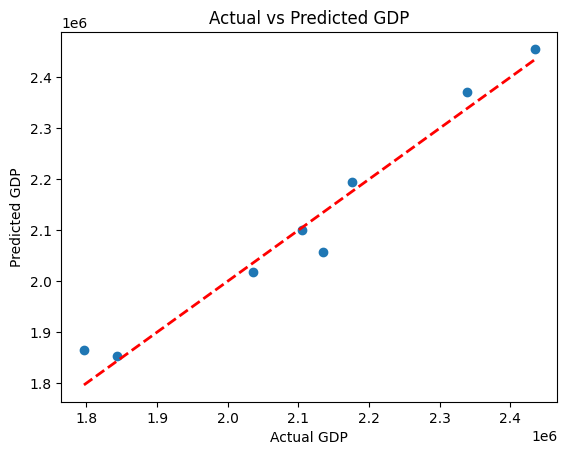

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.show()


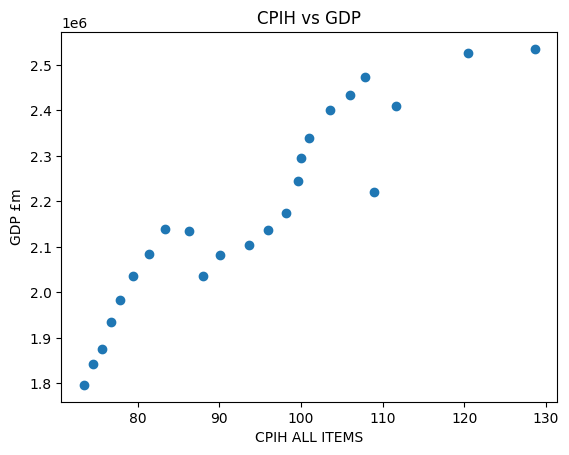

In [25]:
# Scatter plot to see relation between CPIH and GDP
plt.scatter(df['CPIH ALL ITEMS'], df['GDP £m'])
plt.xlabel('CPIH ALL ITEMS')
plt.ylabel('GDP £m')
plt.title('CPIH vs GDP')
plt.show()


<Axes: xlabel='GDP £m', ylabel='Count'>

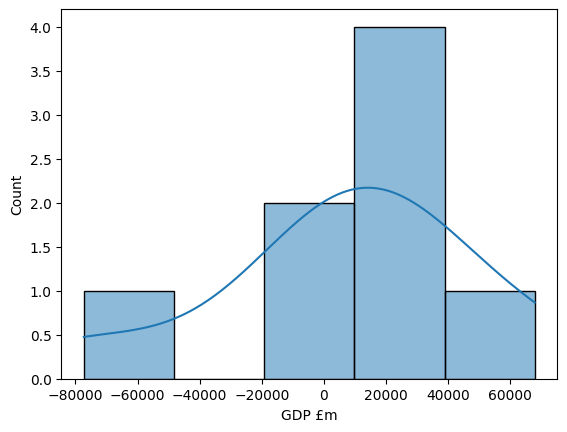

In [26]:
import seaborn as sns
sns.histplot(y_pred-y_test,kde=True)

__Multicollinearity__

Multicollinearity highlights problematic relationships among independent variables rather than ensuring that there are no relationships

In [29]:
import seaborn as sns

# Alternatively, for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
X = df[['CPIH ALL ITEMS', 'Total managed expenditure with respect to GDP', 'Household final consumption expenditure :National concept CVM SA - £m', 'Bank Rate', 'Total Export', 'Total Import']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# VIF = 1: No correlation between this variable and the other variables.
# 1 < VIF < 5: Moderate correlation; usually acceptable.
# VIF ≥ 5 or 10: Indicates high multicollinearity, suggesting that the variable may be redundant and could potentially be removed from the model.


                                             feature          VIF
0                                     CPIH ALL ITEMS   944.671041
1      Total managed expenditure with respect to GDP   177.551699
2  Household final consumption expenditure :Natio...   270.425747
3                                          Bank Rate     2.630718
4                                       Total Export  1394.954931
5                                       Total Import  1369.230465


In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a set of correlated variables into a smaller set of uncorrelated variables called principal components

# Sample DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')
features = df[['CPIH ALL ITEMS', 'Total managed expenditure with respect to GDP', 
                'Household final consumption expenditure :National concept CVM SA - £m', 
                'Bank Rate', 'Total Export', 'Total Import']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components based on your needs
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

# Use pca_df for further modeling


Explained variance by each principal component: [0.73225787 0.15115985]


In [33]:
df

,Year,CPIH ALL ITEMS,United Kingdom population mid-year estimate,Total managed expenditure with respect to GDP,Household final consumption expenditure :National concept CVM SA - £m,Bank Rate,RPI: Percentage change over 12 months - Petrol and Oil incl Fuel Oil,RPI:Percentage change over 12 months - Gas,Total Export,Total Import,Average GFCF,Average Business Investment,"Unemployment rate (aged 16 and over, seasonally adjusted): %",GDP £m
0,2000,73.406083,58886100,35.1,971050,6.00,14.0,-2.5,186824,226639,67.75,74.25,5.4,1796500
1,2001,74.555917,59113000,36.3,1002536,4.00,-5.0,2.7,190682,239314,69.00,74.00,5.1,1842720
2,2002,75.671167,59365700,37.6,1028983,4.00,-3.2,6.3,187459,242006,70.50,72.25,5.2,1875809
3,2003,76.715833,59636700,38.9,1063424,3.75,4.0,1.8,187883,245178,71.75,71.50,5.0,1934941
4,2004,77.779500,59950400,40.0,1092834,4.75,6.0,7.3,191062,258413,74.00,69.00,4.8,1982500
5,2005,79.404250,60413300,39.9,1123830,4.50,9.8,14.8,212494,286539,77.00,74.50,4.8,2036675
6,2006,81.356333,60827100,39.9,1133245,5.00,6.0,31.9,246418,328679,79.25,78.25,5.4,2085162
7,2007,83.305000,61319100,40.2,1171806,5.50,2.5,7.7,222825,316391,82.50,85.00,5.3,2139895
8,2008,86.222583,61823800,43.5,1162090,2.00,16.7,19.8,252593,348631,80.00,82.00,5.7,2134571
9,2009,87.933417,62260500,46.3,1124339,0.50,-8.8,13.7,227951,317207,70.25,68.25,7.6,2035942
